# Praktikum 2

Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

In [ ]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 58.7 MB/s eta 0:00:00


2 Dimensi

Exact NN (Flat) indices: [[286942 583487 695123]] distances: [[3.4966465e-07 1.0151125e-06 1.2744232e-06]]
IVF+PQ indices: [[286942 695123 581054]] distances: [[4.8242509e-07 2.0805746e-06 2.1811575e-06]]
Waktu Exact: 0.005702972412109375
Waktu IVF+PQ: 0.0010800361633300781


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


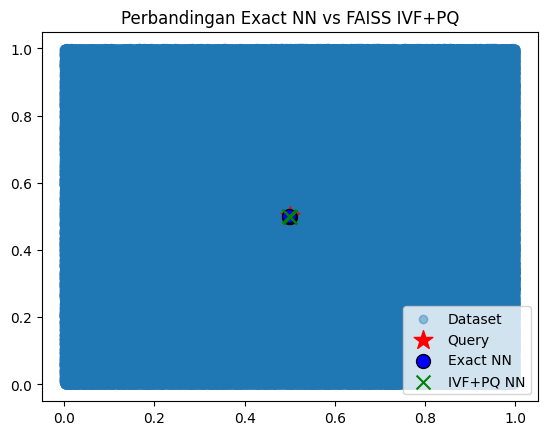

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


5 Dimensi

Exact NN (Flat) indices: [901095 495168 561017] distances: [0.00151859 0.00221511 0.00223645]
IVF+PQ indices: [ 7548  9641 18442] distances: [0.02549807 0.02549807 0.02549807]
Waktu Exact: 12.0549 ms
Waktu IVF+PQ: 0.8121 ms


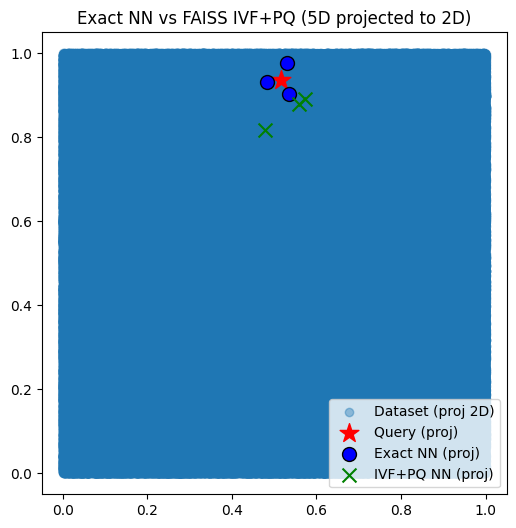

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 5D
np.random.seed(42)
d = 5
n_points = 1000000
X = np.random.rand(n_points, d).astype('float32')
query = np.random.rand(1, d).astype('float32')  # DIRUBAH: Query 1x5

# 2. Exact NN dengan IndexFlatL2
index_flat = faiss.IndexFlatL2(d)  # DIRUBAH: d=5
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10
m = 1  # DIRUBAH: m=1 agar 5 % 1 == 0
quantizer = faiss.IndexFlatL2(d)  # DIRUBAH: d=5
index_ivfpq = faiss.IndexIVFPQ(quantizer, d, nlist, m, 8)  # DIRUBAH: d=5

index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat[0], "distances:", D_flat[0])
print("IVF+PQ indices:", I_ivfpq[0], "distances:", D_ivfpq[0])
print("Waktu Exact:", round(time_flat*1000, 4), "ms")
print("Waktu IVF+PQ:", round(time_ivfpq*1000, 4), "ms")

# 5. Visualisasi (proyeksi ke 2D)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset (proj 2D)")
plt.scatter(query[0,0], query[0,1], c='red', marker='*', s=200, label="Query (proj)")

# Tetangga dari Flat (top 3)
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN (proj)")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN (proj)")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ (5D projected to 2D)")
plt.show()  # Atau plt.savefig('plot.png') jika no display

Hasil:
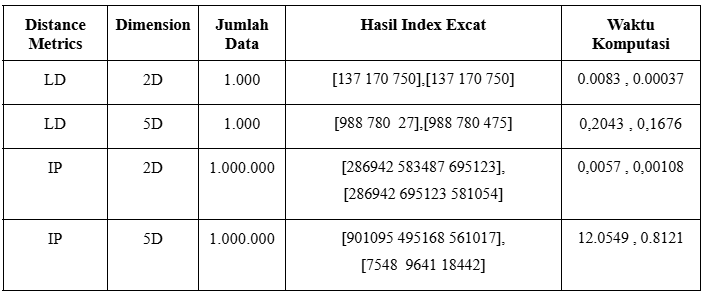